<a href="https://colab.research.google.com/github/otunmartins/multi-class-classification/blob/main/Image_Classification_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification Deep Learning Task using `Multi Cancer Dataset` dataset from Kaggle.

Dataset URL: https://www.kaggle.com/datasets/obulisainaren/multi-cancer

This project will cover:
0. GPU Runtime Setup
1. How to obtain Kaggle API from the user account.
2. How to load the API on google colab.
3. Steps to download the dataset and validate that it was downloaded correctly.
4. Exploring the dataset directory and folders structure, sample size, and visualization.
5. Creating a Dataset class using PyTorch with basic transformation, and splitting the data into 70% training and 15% validation, and 15% testing.
6. Creating experiment hyperparameters.
7. Setting up training networks and components.
8. Model Training, Validation, and Testing.
9. Export the model (Optional).

### 0. GPU Runtime Setup

In order to run this project, it is very important to change the runtime session type to GPU instead of the default CPU. To do so:
1. On the  top bar, click on "Runtime" > "Change runtime type".

(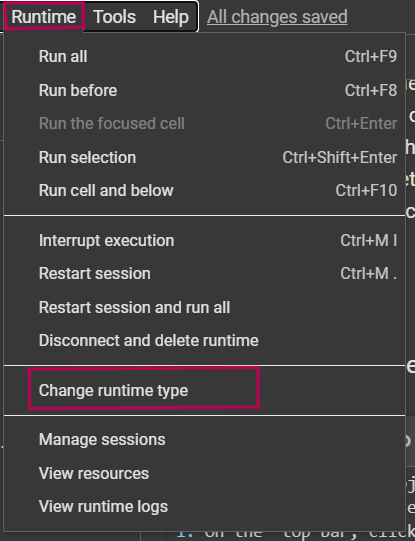

2. Change your Hardware accelerator to the available GPU.

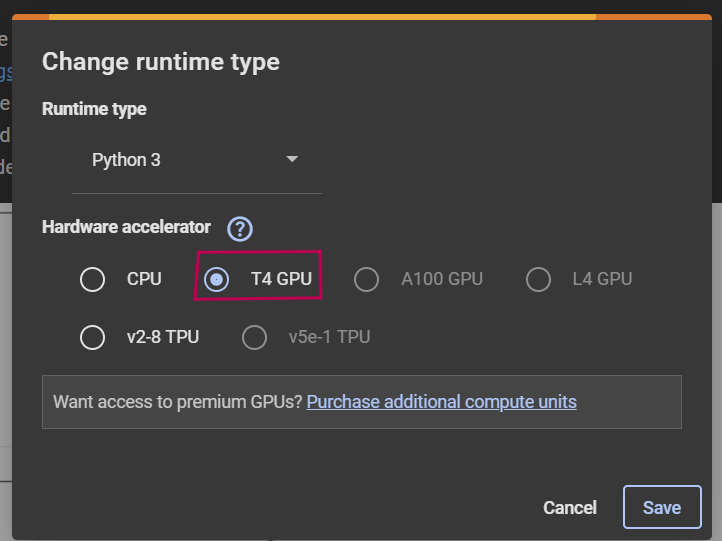

### 1. How to obtain Kaggle API from the user account?

1. First step is to create a Kaggle account, please head to https://www.kaggle.com/account/login?phase=startRegisterTab&returnUrl=%2Fsettings and create an account.
2. Once an account is created, please click on the account on the top right corner then settings.
3. Scroll down until you reach the API section and click on `Create New Token`
4. A JSON file will be downloaded on your local device.bold text

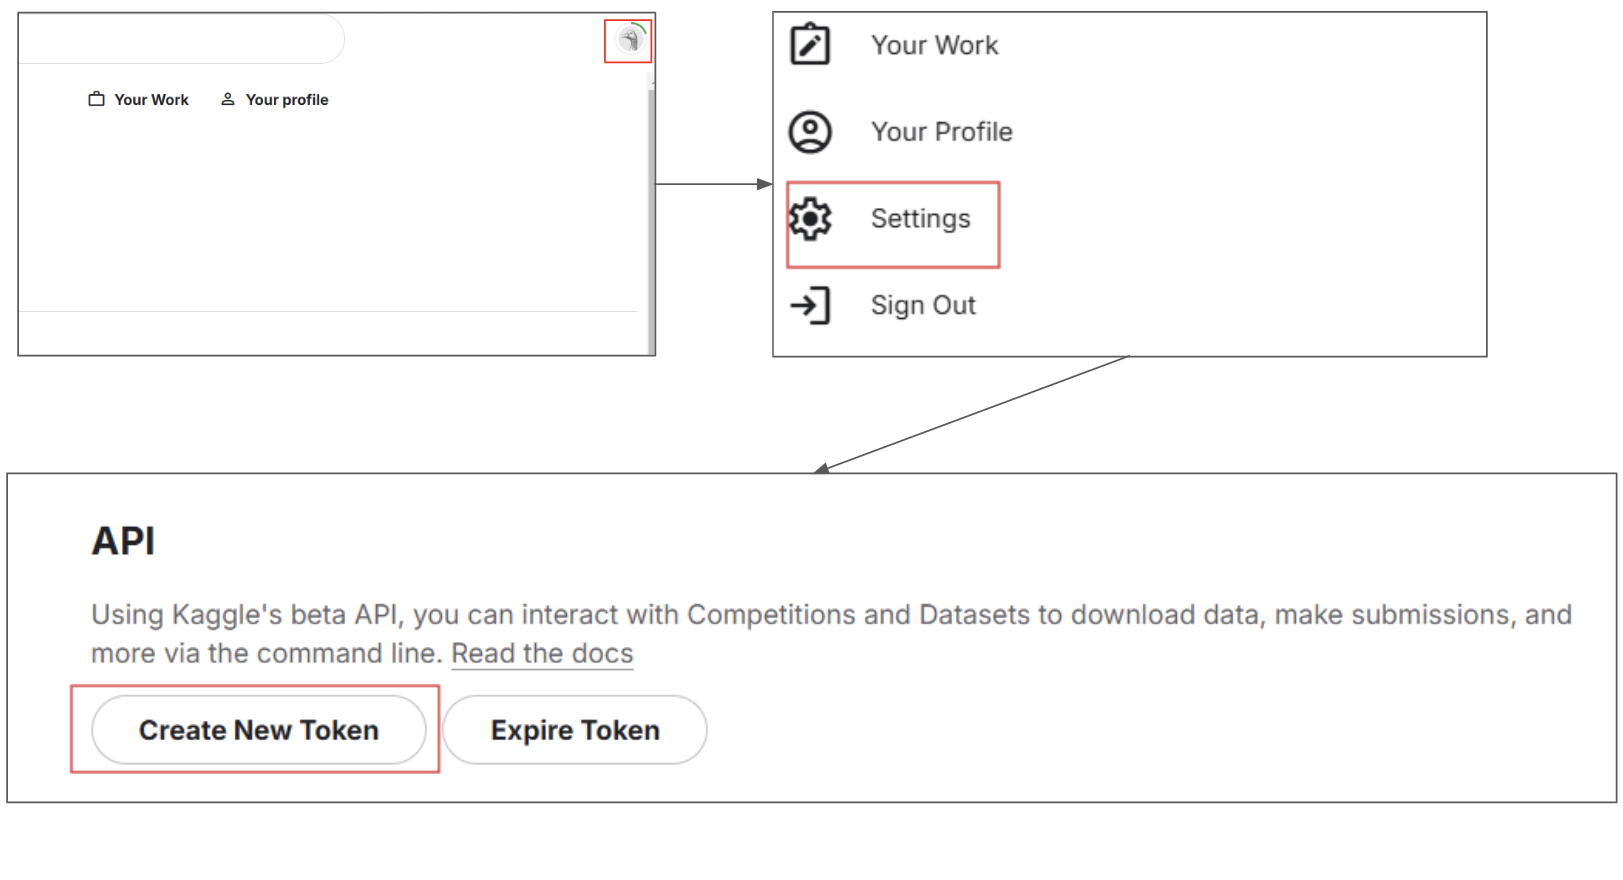

### 2. How to load the API on google colab.

1. Run the cell below, and click on `Choose files`, then choose the JSON file that was previously downloaded.

In [1]:
# Global imports
import os
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import torch
from collections import Counter
import copy
from sklearn.model_selection import train_test_split
import albumentations as A
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchsummary import summary

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"martinsotun","key":"238e6003e003552c2cc3978dfa9ca186"}'}

In [3]:
# Install Kaggle
!pip install kaggle

# Create a directory for the Kaggle file and move it there
!mkdir -p ~/.kaggle

In [4]:
# move the uploaded kaggle keys into kaggle directory
!mv kaggle.json ~/.kaggle/

# Change permissions for the Kaggle API token
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
os.listdir('./')

['.config', 'sample_data']

### 3. Steps to download the dataset and validate that it was downloaded correctly.

In [6]:
# Replace "obulisainaren/multi-cancer" with the dataset path from Kaggle
!kaggle datasets download -d obulisainaren/multi-cancer

# Unzip the dataset
!unzip multi-cancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0003.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0004.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0005.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0006.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0007.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0008.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0009.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0010.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0011.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0012.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_0013.jpg  
  inflating: Multi Cancer/Multi Cancer/Oral Cancer/oral_scc/oral_scc_

Validating that the dataset folder is in our directory

In [7]:
# We can see that `Multi Cancer` is in the directory
os.listdir('./')

['.config', 'README.md', 'Multi Cancer', 'multi-cancer.zip', 'sample_data']

In [8]:
base_path = './Multi Cancer/Multi Cancer'
os.listdir(base_path)

['Oral Cancer',
 'Breast Cancer',
 'ALL',
 'Brain Cancer',
 'Kidney Cancer',
 'Lymphoma',
 'Lung and Colon Cancer',
 'Cervical Cancer']

### 4. Exploring the dataset directory and folders structure, sample size, and visualization.

In [9]:
# Inspect the full structure
for main_folder in os.listdir(base_path):
    main_folder_path = os.path.join(base_path, main_folder)
    print(f"Main Folder: {main_folder}")
    if os.path.isdir(main_folder_path):
        subfolders = os.listdir(main_folder_path)
        for subfolder in subfolders:
            subfolder_path = os.path.join(main_folder_path, subfolder)
            num_images = len(os.listdir(subfolder_path))
            print(f"  Subfolder (Class): {subfolder}, Number of Images: {num_images}")


Main Folder: Oral Cancer
  Subfolder (Class): oral_normal, Number of Images: 5001
  Subfolder (Class): oral_scc, Number of Images: 5001
Main Folder: Breast Cancer
  Subfolder (Class): breast_malignant, Number of Images: 5000
  Subfolder (Class): breast_benign, Number of Images: 5000
Main Folder: ALL
  Subfolder (Class): all_early, Number of Images: 5000
  Subfolder (Class): all_pre, Number of Images: 5000
  Subfolder (Class): all_benign, Number of Images: 5000
  Subfolder (Class): all_pro, Number of Images: 5000
Main Folder: Brain Cancer
  Subfolder (Class): brain_glioma, Number of Images: 5000
  Subfolder (Class): brain_menin, Number of Images: 5000
  Subfolder (Class): brain_tumor, Number of Images: 5000
Main Folder: Kidney Cancer
  Subfolder (Class): kidney_tumor, Number of Images: 5000
  Subfolder (Class): kidney_normal, Number of Images: 5000
Main Folder: Lymphoma
  Subfolder (Class): lymph_cll, Number of Images: 5000
  Subfolder (Class): lymph_mcl, Number of Images: 5000
  Subfol

How many samples are in the total dataset? The website mentioned 130k files, but let's validate that!

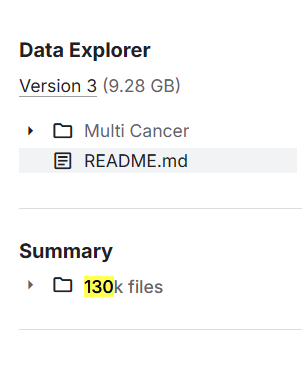

**Observation?** This is a multi-class image classification problem. As we can define multiple classes, for instance (Oral Cancer vs Brain Cancer vs Cervical Cancer vs Kideny vs Acute Lymphoblastic Leukemia (ALL) vs Lung and Colon Cancer vs Lymphoma vs Breast Cancer).

Splitting the dataset into 8 classes to train a multi-class image classifier.

We will define the classes in text then pair them to a numerical value.

In [10]:
multi_class_dataset_labels = {
    "Oral Cancer": 0,
    "Brain Cancer": 1,
    "Cervical Cancer": 2,
    "Kidney Cancer": 3,
    "ALL": 4,
    "Lung and Colon Cancer": 5,
    "Lymphoma": 6,
    "Breast Cancer": 7
}

In [11]:
data = []

for main_folder in os.listdir(base_path):
    main_folder_path = os.path.join(base_path, main_folder)
    if os.path.isdir(main_folder_path):
        for subfolder in os.listdir(main_folder_path):
            subfolder_path = os.path.join(main_folder_path, subfolder)
            for image_name in os.listdir(subfolder_path):
                image_path = os.path.join(subfolder_path, image_name)
                label = f"{main_folder}_{subfolder}"  # Create combined label
                # data.append((image_path, label))

                data.append((main_folder, # append the main_folder name of the global class
                             multi_class_dataset_labels[main_folder], # append the numeric label
                             image_path # append the image path
                             ))


print(f"Total images: {len(data)}")
print(f"Example data: {data[10002]}")

Total images: 130002
Example data: ('Breast Cancer', 7, './Multi Cancer/Multi Cancer/Breast Cancer/breast_malignant/breast_malignant_4295.jpg')


In [12]:
# Validation of number of classes
classes_labels = np.unique([label for label, _, _ in data])
print(len(classes_labels))

8


**Observation?** There is class imbalance in the dataset at the global class level, where the class of "Cervical Cancer" and class "Lung and Colon Cancer" has the most classes. The imbalance is not however extreme as the remaining of classes are close to each others.

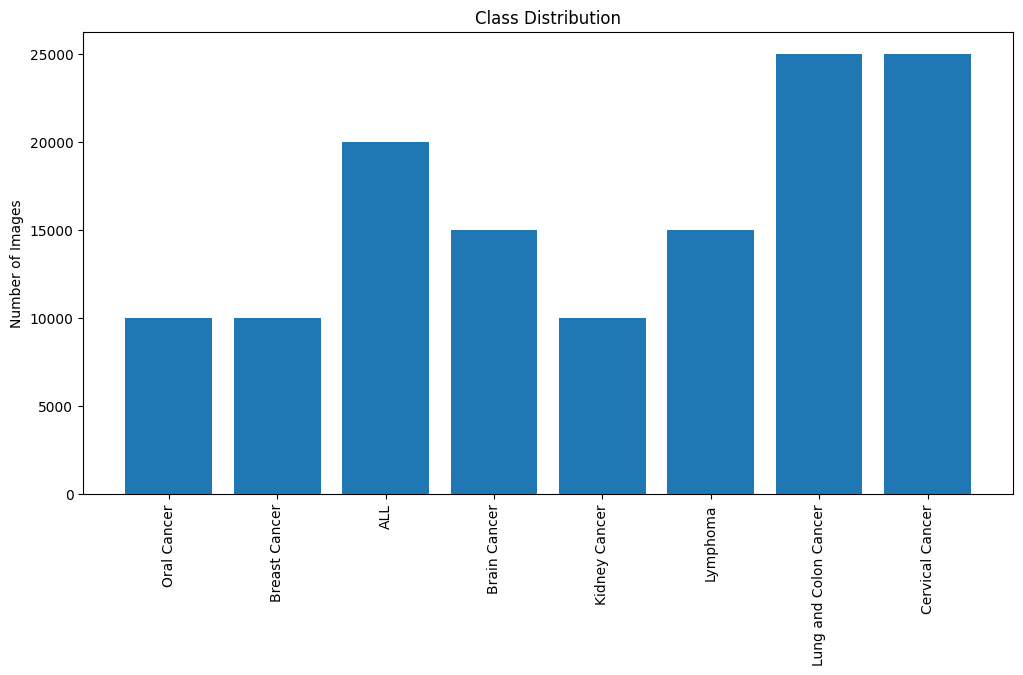

In [13]:
# Extract labels and count occurrences
labels = [label for label, _, _ in data]
label_counts = Counter(labels)

# Display the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()


### 5. Creating a Dataset class using PyTorch with basic transformation, and splitting the data into 70% training and 15% validation, and 15% testing.

In [14]:
# Dataset class used to load the data, will help in passing the data to a dataloader for training with a CNN using PyTorch
class CancerDataset(Dataset):
    def __init__(self, data, split='train', transform=True):
        """
        Args:
            data (list): List of tuples (image_path, label).
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.data = data
        self.split = split
        self.transform = transform
        self.input_size = (224, 224)

        self.n_classes = np.unique([label for label, _, _ in data])

    def __len__(self):
        return len(self.data)

    def _transform(self, image):
      if self.split == "train":
            transform = A.Compose([
                A.HorizontalFlip(),
                A.VerticalFlip(),
                # A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                A.Rotate(limit=30),
                # A.RandomBrightnessContrast(),
                A.OneOf([
                    A.MotionBlur(blur_limit=5),
                    A.MedianBlur(blur_limit=5),
                    A.GaussianBlur(blur_limit=5),
                    A.GaussNoise(var_limit=(5.0, 30.0)),
                ], p=0.7),
                A.CLAHE(clip_limit=4.0, p=0.7),
                # A.Transpose(),
                # A.HueSaturationValue(hue_shift_limit=(10, 10), val_shift_limit=(10, 10), sat_shift_limit=(20, 20)),
                A.Resize(self.input_size[0], self.input_size[0]),
                A.Normalize(),
            ])
      elif self.split in ["valid", "test"]:
            transform = A.Compose([
                A.Resize(self.input_size[0], self.input_size[1]),
                A.Normalize(),
            ])

      transformed_image = transform(image=np.array(image))['image'] # numpy
      transformed_image = torch.tensor(transformed_image).permute(2, 0, 1) # Convert to a tensor of shape [C, H, W]

      return transformed_image

    def __getitem__(self, idx):
        class_name, label, image_path = self.data[idx]

        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self._transform(image)

        return image, class_name, label


In [15]:
# Split the dataset into train/val sets (70% train, 30% validation)
train_data, valid_data = train_test_split(
    data,
    test_size=0.3,
    stratify=labels,
    random_state=42)

# Split the previously splitted validation dataset into valid/test sets (50% valid, 50% test)
valid_data, test_data = train_test_split(
    data,
    test_size=0.5,
    stratify=labels,
    random_state=42)

In [16]:
print(len(train_data)) # 70% of 130002
print(len(valid_data)) # 15% of 130002
print(len(test_data))  # 15% of 130002

91001
65001
65001


In [17]:
# Create dataset objects
train_dataset = CancerDataset(train_data, split='train', transform=True)
valid_dataset = CancerDataset(valid_data, split='valid', transform=True)
test_dataset = CancerDataset(test_data, split='test', transform=True)

In [18]:
# Printing to validate
print(f"Training set size: {len(train_dataset)}") # 70%
print(f"Valid set size: {len(valid_dataset)}") # 15%
print(f"Test set size: {len(test_dataset)}") # 15%

# Test loading a sample
image, class_name, label = train_dataset[0]
print(f"Image shape: {image.shape}, Class Name: {class_name}, Label: {label}")

Training set size: 91001
Valid set size: 65001
Test set size: 65001


/usr/local/lib/python3.11/dist-packages/pydantic/main.py:214: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


Image shape: torch.Size([3, 224, 224]), Class Name: Lung and Colon Cancer, Label: 5


A helper function to display a single image from the dataset

In [19]:
def denormalize(array, mean, std):
    """
    Denormalize a NumPy array by reversing the normalization process.

    Args:
        array (numpy.ndarray): Input array.
        mean (sequence): Sequence of means for each channel.
        std (sequence): Sequence of standard deviations for each channel.

    Returns:
        numpy.ndarray: Denormalized array.
    """
    # Copy the array to avoid modifying the original
    denormalized_array = copy.deepcopy(array)

    for i in range(len(mean)):
        denormalized_array[..., i] = denormalized_array[..., i] * std[i] + mean[i]

    return denormalized_array
def display_single_image_from_tensor(image, label):
    """
    Displays a single image from a PyTorch tensor with its label.
    Args:
        image (torch.Tensor): Image tensor of shape (H, W, C).
        label (str): Label of the image.
    """
    # Convert from (C, H, W) to (H, W, C)
    image = image.permute(1, 2, 0).numpy()

    # Denormalize and then display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(denormalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))
    plt.title(f"Label: {label}", fontsize=14)
    plt.axis("off")
    plt.show()

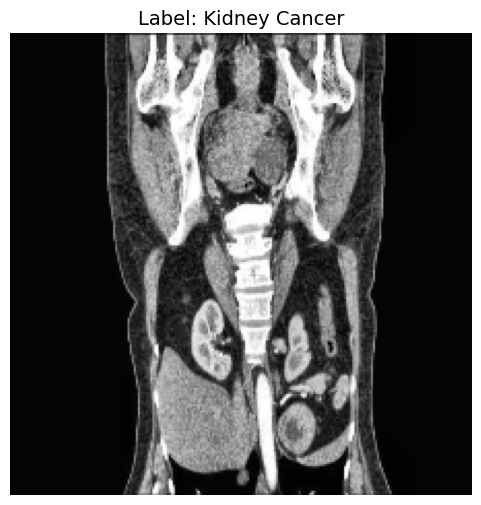

In [20]:
# getting an element and displaying it, for example element number 299 of the training dataset
image, class_name, label = train_dataset[1000]
display_single_image_from_tensor(image, class_name)

A helper function to display a group of images from the dataset

In [21]:
def display_random_images_from_dataset(dataset, num_images=8):
    """
    Displays a grid of randomly selected images from a PyTorch dataset with their labels.
    Args:
        dataset (torch.utils.data.Dataset): PyTorch dataset.
        num_images (int): Number of images to display. Default is 8.
    """
    selected_indices = random.sample(range(len(dataset)), num_images)
    plt.figure(figsize=(16, 8))

    for i, idx in enumerate(selected_indices):
        image, class_name, label = dataset[idx]

        # Convert from (C, H, W) to (H, W, C)
        image = image.permute(1, 2, 0).numpy()

        # Denormalize the numpy image array
        image = denormalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

        # Plot
        plt.subplot(2, 4, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {class_name}", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


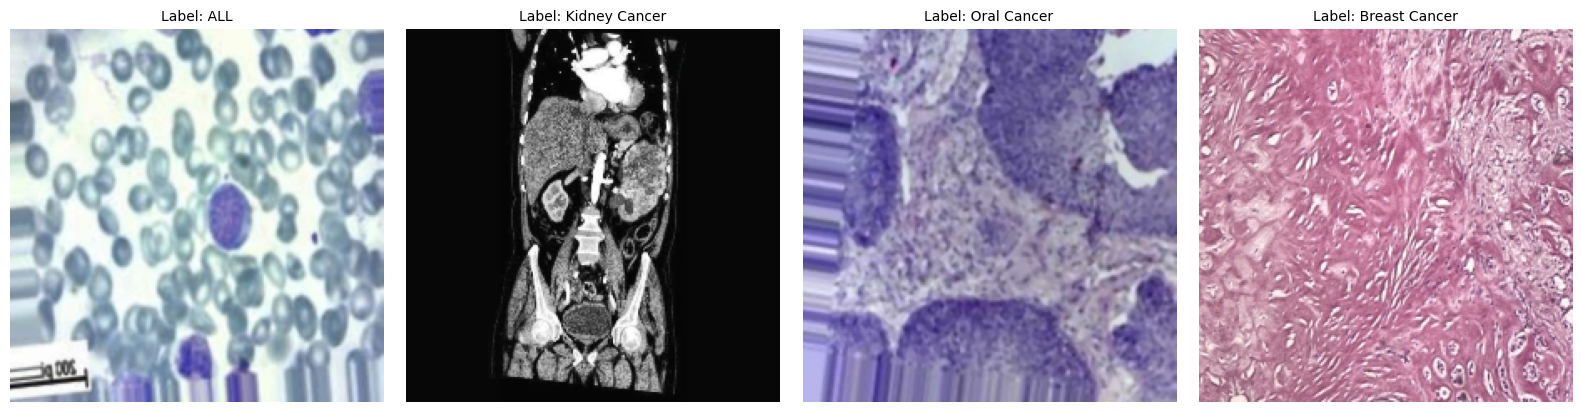

In [ ]:
display_random_images_from_dataset(train_dataset, 4)

### 6. Creating experiment hyperparameters

In [22]:
parameters = {
    "epochs": 3,
    "batch_size": 256,
    "lr": 0.0001,
    "device": "cuda"
}

#### 7. Creating dataloaders

In [23]:
# create train, valid, and test dataloaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=parameters['batch_size'], shuffle=True)

valid_loader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=parameters['batch_size'], shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=parameters['batch_size'], shuffle=False)

In [ ]:
print(len(train_loader), len(valid_loader), len(test_loader))

356 254 254


In [24]:
# Dataloaders Validation
for i in train_loader:
  print(i[0].shape)
  break

for i in valid_loader:
  print(i[0].shape)
  break

for i in test_loader:
  print(i[0].shape)
  break

torch.Size([256, 3, 224, 224])
torch.Size([256, 3, 224, 224])
torch.Size([256, 3, 224, 224])


### 7. Setting up training networks and components

In [25]:
class Model(nn.Module):
    def __init__(self, num_classes, feature_extracting=True):
        super(Model, self).__init__()
        # Load the pre-trained VGG16 model
        self.vgg16 = models.vgg16(pretrained=True)

        # Freeze parameters if feature extracting
        if feature_extracting:
            for param in self.vgg16.parameters():
                param.requires_grad = False

        # Replace the classifier with a custom classifier
        self.vgg16.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        return self.vgg16(x)

In [26]:
summary(Model(num_classes=8).to(parameters['device']), (3, 224, 224))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 94.2MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

### 8. Model Training, Validation, and Testing

In [27]:
# Define number of classes based on your dataset
num_classes = len(train_dataset.n_classes)

# Initialize model
model = Model(num_classes=num_classes)
model = model.to(parameters['device'])

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()), lr=parameters['lr']
)

In [28]:
# Example usage
def run_experiment():
    # Training loop
    num_epochs = parameters['epochs']
    for epoch in range(num_epochs):
        model.train()

        loss_list = []

        for batch_idx, (inputs, _, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(parameters['device']), labels.to(parameters['device'])

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # accumulate the epoch losses
            loss_list.append(loss.item())

            # log batch details every 10 batches
            if (batch_idx + 1) % 10 == 0:
              message = f"Epoch: {epoch+1} Train batch {batch_idx + 1} loss: {loss:.4f}"
              print(message)

        # average the losses
        train_loss = np.mean(loss_list)

        # Validation step
        valid_loss, valid_accuracy = validate_model(model, valid_loader, criterion)

        # get the new lr for logging
        after_lr = optimizer.param_groups[0]["lr"]

        print(f'Epoch: {epoch+1:02}/{num_epochs} | lr: {after_lr:.4e} | train/loss: {train_loss:.5f} | val/loss: {valid_loss:.5f} | val/accuracy: {valid_accuracy:.5f}')

    return model

def validate_model(model, valid_loader, criterion):
    model.eval()
    loss_list = []
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, _, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(parameters['device']), labels.to(parameters['device'])

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # accumulate the epoch losses
            loss_list.append(loss.item())

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    loss = np.mean(loss_list)

    return loss, accuracy

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, _, labels) in enumerate(test_loader):
            inputs, labels = inputs.to(parameters['device']), labels.to(parameters['device'])

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

In [29]:
# Training and validation
model = run_experiment()

Epoch: 1 Train batch 10 loss: 0.1419
Epoch: 1 Train batch 20 loss: 0.1106
Epoch: 1 Train batch 30 loss: 0.0823
Epoch: 1 Train batch 40 loss: 0.1356
Epoch: 1 Train batch 50 loss: 0.0487
Epoch: 1 Train batch 60 loss: 0.0582
Epoch: 1 Train batch 70 loss: 0.0531
Epoch: 1 Train batch 80 loss: 0.0246
Epoch: 1 Train batch 90 loss: 0.0706
Epoch: 1 Train batch 100 loss: 0.0141
Epoch: 1 Train batch 110 loss: 0.0270
Epoch: 1 Train batch 120 loss: 0.0343
Epoch: 1 Train batch 130 loss: 0.0624
Epoch: 1 Train batch 140 loss: 0.0275
Epoch: 1 Train batch 150 loss: 0.0199
Epoch: 1 Train batch 160 loss: 0.0153
Epoch: 1 Train batch 170 loss: 0.0495
Epoch: 1 Train batch 180 loss: 0.0087
Epoch: 1 Train batch 190 loss: 0.0178
Epoch: 1 Train batch 200 loss: 0.0055
Epoch: 1 Train batch 210 loss: 0.0083
Epoch: 1 Train batch 220 loss: 0.0047
Epoch: 1 Train batch 230 loss: 0.0042
Epoch: 1 Train batch 240 loss: 0.0119
Epoch: 1 Train batch 250 loss: 0.0577
Epoch: 1 Train batch 260 loss: 0.0538
Epoch: 1 Train batch 

In [30]:
# Testing the model performance
test_model(model, test_loader)

Test Accuracy: 0.9976


### 9. Export the model (Optional)

In [31]:
# Save the trained model
def save_model(model, path="vgg16_transfer_model.pth"):
    """
    Save the trained model to a file.

    Args:
        model (nn.Module): The trained PyTorch model.
        path (str): Path where the model will be saved.
    """
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

save_model(model, path="./trained_vgg16_model.pth")

Model saved to ./trained_vgg16_model.pth
